In [1]:
ARCHITECTURE = 'ResNet'
EXPERIMENT_TYPE = 'fixed-eps'
ITERATIONS = 2

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tqdm import tqdm
import matplotlib.pyplot as plt
import pathlib
import os
import random
from secrets import randbelow
import foolbox as fb
from datetime import datetime

AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.keras.backend.clear_session()  # For easy reset of notebook state.
#tf.config.experimental_run_functions_eagerly(True)
tf.__version__
#tf.executing_eagerly()


'2.2.0'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 9.5)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


In [ ]:

tf.get_logger().setLevel('ERROR')

In [ ]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/2 [00:00<?, ?it/s]

148/148 [==============================] - 114s 768ms/step - loss: 2.1859 - accuracy: 0.2509 - val_loss: 2.6818 - val_accuracy: 0.1009



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/100


148/148 [==============================] - 115s 777ms/step - loss: 1.8898 - accuracy: 0.3296 - val_loss: 2.4264 - val_accuracy: 0.2183 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 115s 776ms/step - loss: 1.7080 - accuracy: 0.4159 - val_loss: 2.0646 - val_accuracy: 0.3465 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 115s 778ms/step - loss: 1.5118 - accuracy: 0.4840 - val_loss: 1.7115 - val_accuracy: 0.4313 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 115s 780ms/step - loss: 1.3785 - accuracy: 0.5366 - val_loss: 2.0651 - val_accuracy: 0.3541 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 115s 779ms/step - loss: 1.2696 - accuracy: 0.5681 - val_loss: 2.3657 - val_accuracy: 0.3327 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 115s 780ms/step - loss: 1.1848 - accuracy: 0.6051 - val_loss: 1.6293 - val_accuracy: 0.4983 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

148/148 [==============================] - 115s 780ms/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.9871 - val_accuracy: 0.8158 - lr: 1.0000e-04
Epoch 52/100
148/148 [==============================] - 115s 780ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.9728 - val_accuracy: 0.8143 - lr: 1.0000e-04


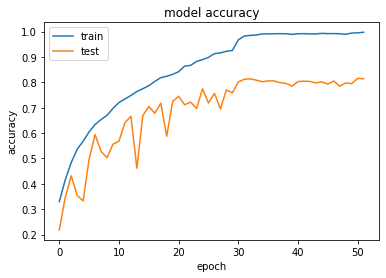

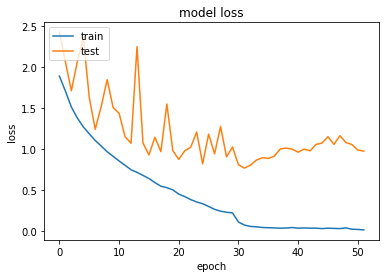

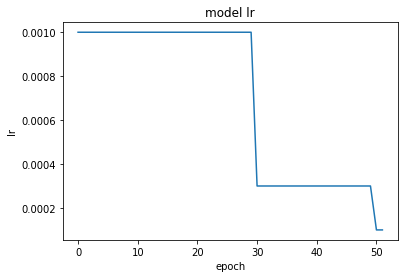

starting bb0 19:05:31
bb0 batch 0 19:05:31
bb0 batch 1 19:13:19
bb0 batch 2 19:21:09
bb0 batch 3 19:28:55
ending bb0 19:36:45
starting pgd 19:36:45
pgd batch 0 19:36:45
pgd batch 1 19:37:45
pgd batch 2 19:38:45
pgd batch 3 19:39:45
ending pgd 19:40:45
starting cw 19:40:45
cw batch 0 19:40:45
cw batch 1 20:03:29
cw batch 2 20:26:11
cw batch 3 20:48:54



1it [3:47:19, 13639.58s/it]

ending cw 21:11:37
current pruning ratio is0.5, current iteration is 0
Epoch 1/100


148/148 [==============================] - 116s 783ms/step - loss: 0.0783 - accuracy: 0.9756 - val_loss: 1.0352 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 116s 784ms/step - loss: 0.0741 - accuracy: 0.9757 - val_loss: 1.1565 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 116s 783ms/step - loss: 0.0712 - accuracy: 0.9779 - val_loss: 1.1656 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 116s 783ms/step - loss: 0.0846 - accuracy: 0.9722 - val_loss: 1.3280 - val_accuracy: 0.7246 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 116s 780ms/step - loss: 0.0981 - accuracy: 0.9680 - val_loss: 1.1931 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 115s 780ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 1.0727 - val_accuracy: 0.7944 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

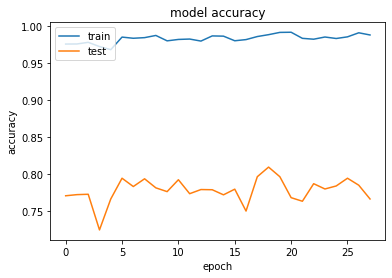

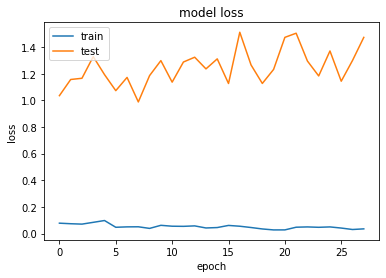

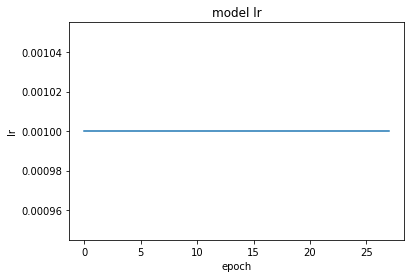

starting bb0 22:06:26
bb0 batch 0 22:06:27
bb0 batch 1 22:14:22
bb0 batch 2 22:22:19
bb0 batch 3 22:30:11
ending bb0 22:38:07
starting pgd 22:38:07
pgd batch 0 22:38:07
pgd batch 1 22:39:07
pgd batch 2 22:40:07
pgd batch 3 22:41:07
ending pgd 22:42:07
starting cw 22:42:07
cw batch 0 22:42:07
cw batch 1 23:04:51
cw batch 2 23:27:34
cw batch 3 23:50:16



2it [6:48:41, 12812.42s/it]

ending cw 00:13:00
current pruning ratio is0.75, current iteration is 0
Epoch 1/100


148/148 [==============================] - 116s 781ms/step - loss: 0.2447 - accuracy: 0.9245 - val_loss: 1.9681 - val_accuracy: 0.5055 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 115s 778ms/step - loss: 0.0725 - accuracy: 0.9822 - val_loss: 0.8215 - val_accuracy: 0.7850 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 115s 778ms/step - loss: 0.0436 - accuracy: 0.9908 - val_loss: 0.8745 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 115s 778ms/step - loss: 0.0405 - accuracy: 0.9895 - val_loss: 0.9387 - val_accuracy: 0.8028 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 115s 778ms/step - loss: 0.0319 - accuracy: 0.9927 - val_loss: 0.9685 - val_accuracy: 0.8048 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 115s 778ms/step - loss: 0.0291 - accuracy: 0.9926 - val_loss: 0.8957 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

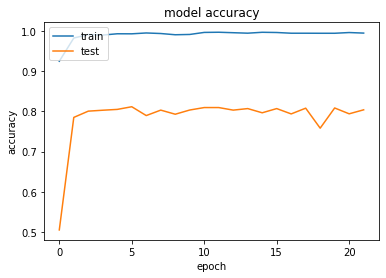

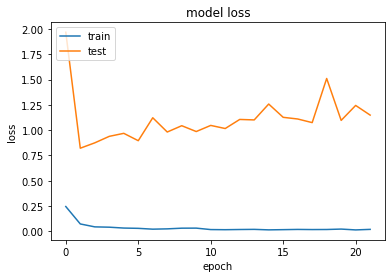

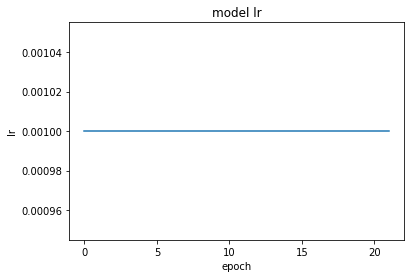

starting bb0 00:56:03
bb0 batch 0 00:56:03
bb0 batch 1 01:04:04
bb0 batch 2 01:12:03
bb0 batch 3 01:20:04
ending bb0 01:28:04
starting pgd 01:28:04
pgd batch 0 01:28:04
pgd batch 1 01:29:04
pgd batch 2 01:30:04
pgd batch 3 01:31:04
ending pgd 01:32:04
starting cw 01:32:05
cw batch 0 01:32:05
cw batch 1 01:54:48
cw batch 2 02:17:32
cw batch 3 02:40:14



3it [9:38:39, 12027.92s/it]

ending cw 03:02:57
current pruning ratio is0.875, current iteration is 0
Epoch 1/100


148/148 [==============================] - 116s 782ms/step - loss: 0.4273 - accuracy: 0.8641 - val_loss: 1.4886 - val_accuracy: 0.5488 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 115s 779ms/step - loss: 0.1429 - accuracy: 0.9594 - val_loss: 0.7562 - val_accuracy: 0.7839 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 115s 779ms/step - loss: 0.0797 - accuracy: 0.9807 - val_loss: 0.7319 - val_accuracy: 0.8127 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 115s 779ms/step - loss: 0.0538 - accuracy: 0.9880 - val_loss: 0.7659 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 115s 779ms/step - loss: 0.0433 - accuracy: 0.9898 - val_loss: 0.8355 - val_accuracy: 0.8025 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 115s 779ms/step - loss: 0.0346 - accuracy: 0.9928 - val_loss: 0.7839 - val_accuracy: 0.8201 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

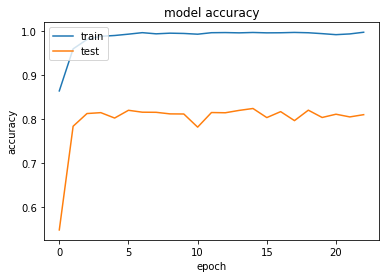

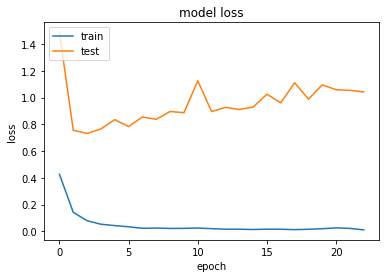

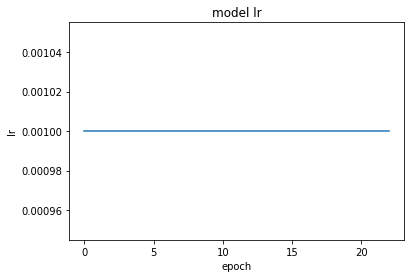

starting bb0 03:48:00
bb0 batch 0 03:48:00
bb0 batch 1 03:56:03
bb0 batch 2 04:04:07
bb0 batch 3 04:12:08
ending bb0 04:20:15
starting pgd 04:20:15
pgd batch 0 04:20:15
pgd batch 1 04:21:15
pgd batch 2 04:22:15
pgd batch 3 04:23:15
ending pgd 04:24:15
starting cw 04:24:15
cw batch 0 04:24:15
cw batch 1 04:46:58
cw batch 2 05:09:41
cw batch 3 05:32:24



4it [12:30:48, 11518.41s/it]

ending cw 05:55:07
current pruning ratio is0.9375, current iteration is 0
Epoch 1/100


148/148 [==============================] - 116s 781ms/step - loss: 0.2358 - accuracy: 0.9291 - val_loss: 0.7203 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 115s 778ms/step - loss: 0.0553 - accuracy: 0.9877 - val_loss: 0.7090 - val_accuracy: 0.8227 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 116s 781ms/step - loss: 0.0347 - accuracy: 0.9949 - val_loss: 0.7771 - val_accuracy: 0.8155 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 116s 781ms/step - loss: 0.0293 - accuracy: 0.9936 - val_loss: 0.8568 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 116s 781ms/step - loss: 0.0239 - accuracy: 0.9949 - val_loss: 0.8680 - val_accuracy: 0.8115 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 116s 781ms/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 0.8861 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

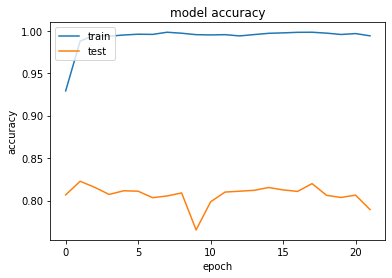

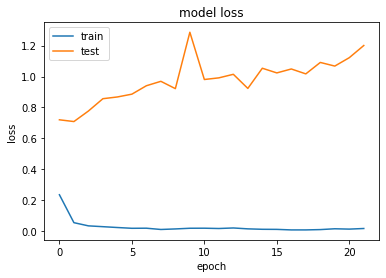

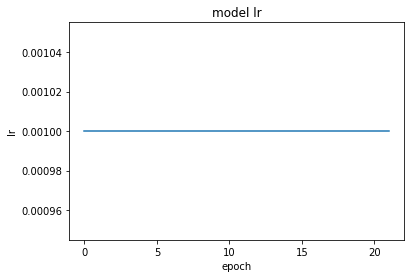

starting bb0 06:38:15
bb0 batch 0 06:38:15
bb0 batch 1 06:46:24
bb0 batch 2 06:54:30
bb0 batch 3 07:02:37
ending bb0 07:10:46
starting pgd 07:10:46
pgd batch 0 07:10:46
pgd batch 1 07:11:46
pgd batch 2 07:12:46
pgd batch 3 07:13:46
ending pgd 07:14:46
starting cw 07:14:47
cw batch 0 07:14:47
cw batch 1 07:37:28
cw batch 2 08:00:09
cw batch 3 08:22:50



5it [15:21:14, 11130.63s/it]

ending cw 08:45:32
current pruning ratio is0.96875, current iteration is 0
Epoch 1/100


148/148 [==============================] - 113s 766ms/step - loss: 2.4292 - accuracy: 0.1017 - val_loss: 6.5885 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 113s 763ms/step - loss: 2.3119 - accuracy: 0.0990 - val_loss: 3.5640 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 113s 763ms/step - loss: 2.3095 - accuracy: 0.1051 - val_loss: 2.4562 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 113s 763ms/step - loss: 2.3114 - accuracy: 0.1047 - val_loss: 2.3200 - val_accuracy: 0.0983 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 113s 763ms/step - loss: 2.3109 - accuracy: 0.1042 - val_loss: 2.3063 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 113s 763ms/step - loss: 2.3135 - accuracy: 0.0935 - val_loss: 2.3130 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

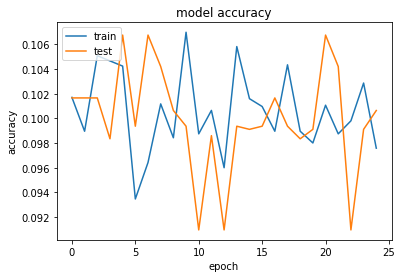

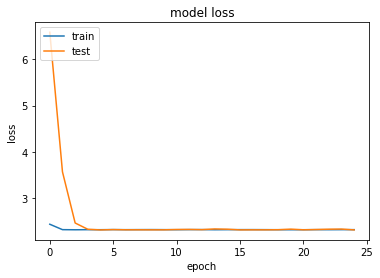

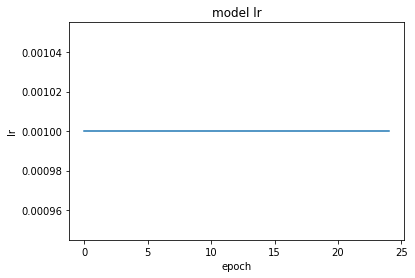

starting pgd 09:33:30
pgd batch 0 09:33:30
pgd batch 1 09:34:29
pgd batch 2 09:35:29
pgd batch 3 09:36:28
ending pgd 09:37:28
starting cw 09:37:28
cw batch 0 09:37:28
cw batch 1 10:00:12
cw batch 2 10:22:46
cw batch 3 10:45:20



6it [17:43:37, 10354.15s/it]

ending cw 11:07:55
current pruning ratio is0.984375, current iteration is 0
Epoch 1/100


148/148 [==============================] - 113s 765ms/step - loss: 2.3322 - accuracy: 0.0988 - val_loss: 2.3065 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 113s 766ms/step - loss: 2.3061 - accuracy: 0.1016 - val_loss: 2.3086 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3063 - accuracy: 0.1054 - val_loss: 2.3075 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3069 - accuracy: 0.1032 - val_loss: 2.3048 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 113s 766ms/step - loss: 2.3056 - accuracy: 0.0969 - val_loss: 2.3104 - val_accuracy: 0.0910 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3055 - accuracy: 0.1042 - val_loss: 2.3062 - val_accuracy: 0.0991 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

148/148 [==============================] - 113s 764ms/step - loss: 2.3026 - accuracy: 0.0974 - val_loss: 2.3039 - val_accuracy: 0.0910 - lr: 1.0000e-04
Epoch 52/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3025 - accuracy: 0.1030 - val_loss: 2.3032 - val_accuracy: 0.0910 - lr: 1.0000e-04
Epoch 53/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3025 - accuracy: 0.1035 - val_loss: 2.3034 - val_accuracy: 0.0991 - lr: 1.0000e-04
Epoch 54/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3035 - val_accuracy: 0.0991 - lr: 1.0000e-04
Epoch 55/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3026 - accuracy: 0.1035 - val_loss: 2.3033 - val_accuracy: 0.0910 - lr: 1.0000e-04
Epoch 56/100
148/148 [==============================] - 113s 764ms/step - loss: 2.3026 - accuracy: 0.1021 - val_loss: 2.3036 - val_accuracy: 0.0910 - lr: 1.0000e-04
Epoch 57/100
148/148 [=

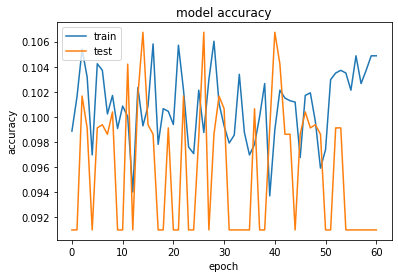

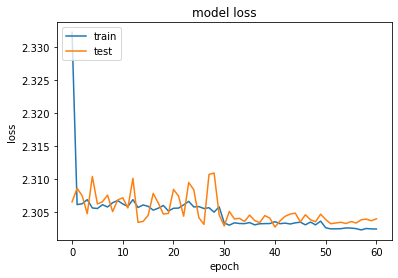

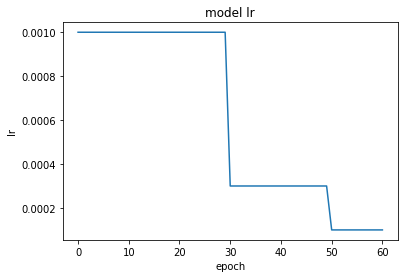

starting pgd 13:04:40
pgd batch 0 13:04:40
pgd batch 1 13:05:39
pgd batch 2 13:06:39
pgd batch 3 13:07:39
ending pgd 13:08:39
starting cw 13:08:39
cw batch 0 13:08:39
cw batch 1 13:31:13
cw batch 2 17:16:49
cw batch 3 17:39:24



7it [24:37:44, 12666.30s/it]
 50%|█████     | 1/2 [24:39:40<24:39:40, 88780.46s/it]

ending cw 18:02:02


148/148 [==============================] - 123s 834ms/step - loss: 2.1933 - accuracy: 0.2498 - val_loss: 2.5052 - val_accuracy: 0.1019



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/100


148/148 [==============================] - 123s 834ms/step - loss: 1.8939 - accuracy: 0.3432 - val_loss: 2.6089 - val_accuracy: 0.1493 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 123s 831ms/step - loss: 1.6633 - accuracy: 0.4316 - val_loss: 2.0062 - val_accuracy: 0.3873 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 123s 831ms/step - loss: 1.4917 - accuracy: 0.4926 - val_loss: 2.0886 - val_accuracy: 0.3559 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 123s 831ms/step - loss: 1.3450 - accuracy: 0.5530 - val_loss: 2.2210 - val_accuracy: 0.3131 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 123s 831ms/step - loss: 1.2525 - accuracy: 0.5788 - val_loss: 1.7121 - val_accuracy: 0.4846 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 123s 831ms/step - loss: 1.1422 - accuracy: 0.6180 - val_loss: 1.8878 - val_accuracy: 0.4578 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

148/148 [==============================] - 123s 833ms/step - loss: 0.0135 - accuracy: 0.9973 - val_loss: 0.9905 - val_accuracy: 0.8237 - lr: 1.0000e-04


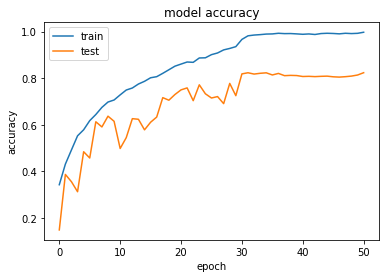

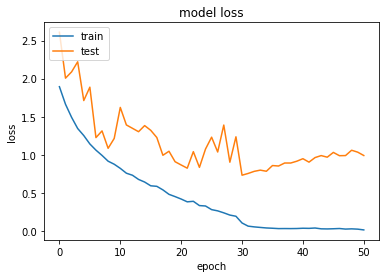

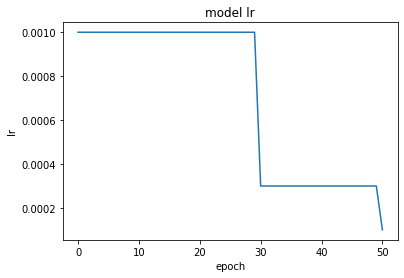

starting bb0 19:49:57
bb0 batch 0 19:49:58
bb0 batch 1 19:57:49
bb0 batch 2 20:05:42
bb0 batch 3 20:13:35
ending bb0 20:21:32
starting pgd 20:21:32
pgd batch 0 20:21:32
pgd batch 1 20:22:32
pgd batch 2 20:23:32
pgd batch 3 20:24:32
ending pgd 20:25:32
starting cw 20:25:33
cw batch 0 20:25:33
cw batch 1 20:48:15
cw batch 2 21:10:58
cw batch 3 21:33:39



1it [3:52:14, 13934.28s/it]

ending cw 21:56:22
current pruning ratio is0.5, current iteration is 1
Epoch 1/100


148/148 [==============================] - 124s 835ms/step - loss: 0.0833 - accuracy: 0.9725 - val_loss: 0.9366 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 124s 835ms/step - loss: 0.0699 - accuracy: 0.9772 - val_loss: 1.0055 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 124s 835ms/step - loss: 0.0610 - accuracy: 0.9807 - val_loss: 1.1974 - val_accuracy: 0.7534 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 124s 835ms/step - loss: 0.0658 - accuracy: 0.9777 - val_loss: 1.2060 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 123s 832ms/step - loss: 0.0750 - accuracy: 0.9759 - val_loss: 1.0698 - val_accuracy: 0.7875 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 123s 833ms/step - loss: 0.0680 - accuracy: 0.9769 - val_loss: 1.0599 - val_accuracy: 0.7921 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

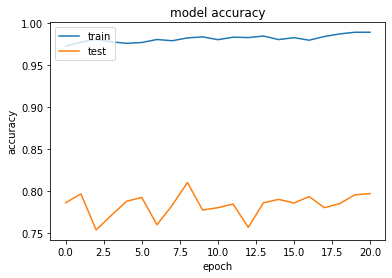

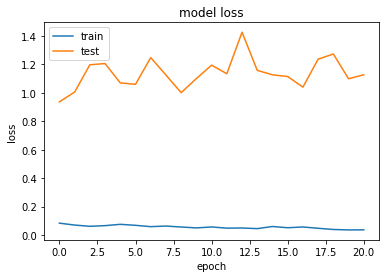

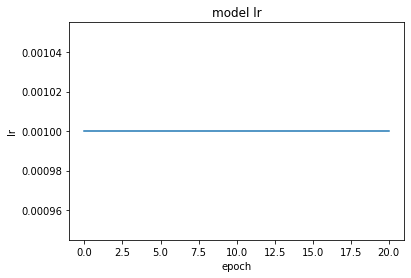

starting bb0 22:40:20
bb0 batch 0 22:40:20
bb0 batch 1 22:48:05
bb0 batch 2 22:56:03
bb0 batch 3 23:03:54
ending bb0 23:12:00
starting pgd 23:12:00
pgd batch 0 23:12:00
pgd batch 1 23:13:00
pgd batch 2 23:14:00
pgd batch 3 23:15:00
ending pgd 23:16:00
starting cw 23:16:01
cw batch 0 23:16:01
cw batch 1 23:38:43
cw batch 2 00:01:27
cw batch 3 00:24:09



2it [6:42:44, 12822.98s/it]

ending cw 00:46:52
current pruning ratio is0.75, current iteration is 1
Epoch 1/100


148/148 [==============================] - 123s 833ms/step - loss: 0.2578 - accuracy: 0.9221 - val_loss: 2.0369 - val_accuracy: 0.4864 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 123s 830ms/step - loss: 0.0787 - accuracy: 0.9807 - val_loss: 0.8329 - val_accuracy: 0.7832 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 123s 830ms/step - loss: 0.0532 - accuracy: 0.9867 - val_loss: 0.8516 - val_accuracy: 0.8005 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 123s 831ms/step - loss: 0.0383 - accuracy: 0.9911 - val_loss: 0.8813 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 123s 830ms/step - loss: 0.0325 - accuracy: 0.9914 - val_loss: 0.9163 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 123s 830ms/step - loss: 0.0238 - accuracy: 0.9941 - val_loss: 0.9904 - val_accuracy: 0.7995 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

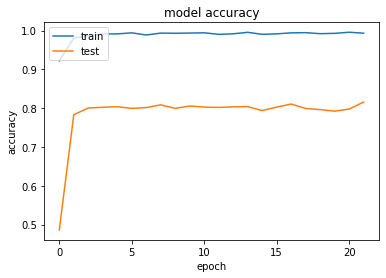

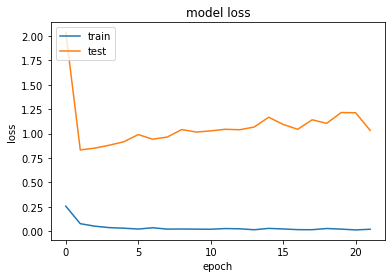

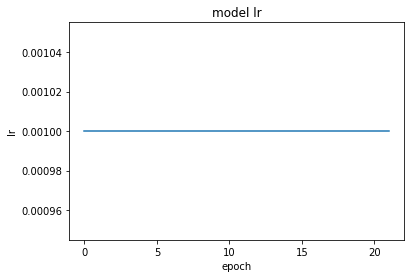

starting bb0 01:32:47
bb0 batch 0 01:32:47
bb0 batch 1 01:40:42
bb0 batch 2 01:48:40
bb0 batch 3 01:56:28
ending bb0 02:04:35
starting pgd 02:04:35
pgd batch 0 02:04:35
pgd batch 1 02:05:35
pgd batch 2 02:06:35
pgd batch 3 02:07:35
ending pgd 02:08:35
starting cw 02:08:36
cw batch 0 02:08:36
cw batch 1 02:31:18
cw batch 2 02:54:01
cw batch 3 03:16:44



3it [9:35:20, 12082.87s/it]

ending cw 03:39:28
current pruning ratio is0.875, current iteration is 1
Epoch 1/100


148/148 [==============================] - 123s 832ms/step - loss: 0.3647 - accuracy: 0.8779 - val_loss: 1.4655 - val_accuracy: 0.5587 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 123s 830ms/step - loss: 0.1220 - accuracy: 0.9639 - val_loss: 0.7150 - val_accuracy: 0.7975 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 123s 829ms/step - loss: 0.0750 - accuracy: 0.9788 - val_loss: 0.7198 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 123s 829ms/step - loss: 0.0486 - accuracy: 0.9904 - val_loss: 0.7706 - val_accuracy: 0.8132 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 123s 830ms/step - loss: 0.0363 - accuracy: 0.9921 - val_loss: 0.8087 - val_accuracy: 0.8143 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 123s 829ms/step - loss: 0.0308 - accuracy: 0.9931 - val_loss: 0.8786 - val_accuracy: 0.8064 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

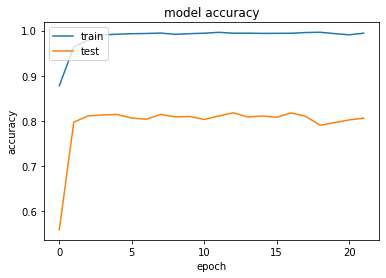

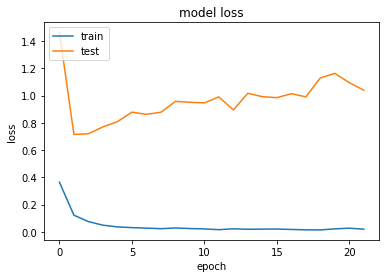

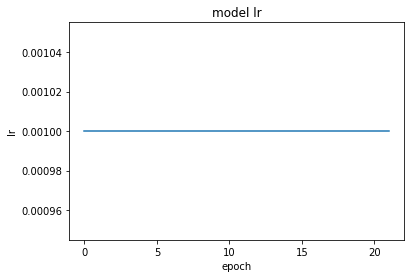

starting bb0 04:25:19
bb0 batch 0 04:25:19
bb0 batch 1 04:33:27
bb0 batch 2 04:41:35
bb0 batch 3 04:49:30
ending bb0 04:57:37
starting pgd 04:57:37
pgd batch 0 04:57:37
pgd batch 1 04:58:37
pgd batch 2 04:59:37
pgd batch 3 05:00:37
ending pgd 05:01:37
starting cw 05:01:37
cw batch 0 05:01:37
cw batch 1 05:24:20
cw batch 2 05:47:03
cw batch 3 06:09:45



4it [12:28:21, 11572.38s/it]

ending cw 06:32:29
current pruning ratio is0.9375, current iteration is 1
Epoch 1/100


148/148 [==============================] - 123s 831ms/step - loss: 0.2756 - accuracy: 0.9153 - val_loss: 0.7971 - val_accuracy: 0.7845 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 123s 829ms/step - loss: 0.0517 - accuracy: 0.9902 - val_loss: 0.7171 - val_accuracy: 0.8196 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 123s 829ms/step - loss: 0.0371 - accuracy: 0.9930 - val_loss: 0.7640 - val_accuracy: 0.8161 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 123s 829ms/step - loss: 0.0263 - accuracy: 0.9947 - val_loss: 0.7879 - val_accuracy: 0.8178 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 123s 831ms/step - loss: 0.0217 - accuracy: 0.9956 - val_loss: 0.8178 - val_accuracy: 0.8196 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 123s 832ms/step - loss: 0.0169 - accuracy: 0.9970 - val_loss: 0.8222 - val_accuracy: 0.8204 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

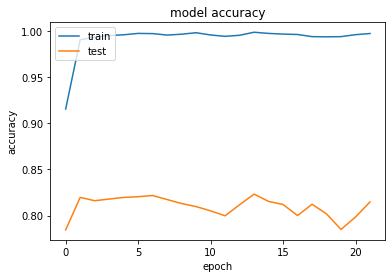

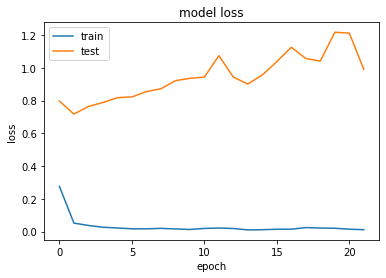

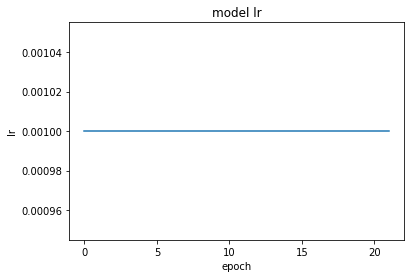

starting bb0 07:18:22
bb0 batch 0 07:18:23
bb0 batch 1 07:26:29
bb0 batch 2 07:34:30
bb0 batch 3 07:42:33
ending bb0 07:50:30
starting pgd 07:50:30
pgd batch 0 07:50:30
pgd batch 1 07:51:30
pgd batch 2 07:52:30
pgd batch 3 07:53:30
ending pgd 07:54:30
starting cw 07:54:30
cw batch 0 07:54:30
cw batch 1 08:17:14
cw batch 2 08:39:57
cw batch 3 09:02:40



5it [15:21:21, 11214.71s/it]

ending cw 09:25:29
current pruning ratio is0.96875, current iteration is 1
Epoch 1/100


148/148 [==============================] - 120s 814ms/step - loss: 2.3559 - accuracy: 0.1010 - val_loss: 2.9959 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 2/100
148/148 [==============================] - 120s 811ms/step - loss: 2.3096 - accuracy: 0.0985 - val_loss: 2.4839 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 3/100
148/148 [==============================] - 120s 811ms/step - loss: 2.3114 - accuracy: 0.1000 - val_loss: 2.3255 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 4/100
148/148 [==============================] - 120s 811ms/step - loss: 2.3132 - accuracy: 0.0964 - val_loss: 2.3148 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 5/100
148/148 [==============================] - 120s 810ms/step - loss: 2.3110 - accuracy: 0.1009 - val_loss: 2.3076 - val_accuracy: 0.0986 - lr: 0.0010
Epoch 6/100
148/148 [==============================] - 120s 810ms/step - loss: 2.3115 - accuracy: 0.0966 - val_loss: 2.3212 - val_accuracy: 0.1017 - lr: 0.0010
Epoch 7/100
148/148 [==============================]

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

In [3]:
def run_experiment(structure='unstructured', method='random', scope='global', iterations=10):
    experiment_name = f'{EXPERIMENT_TYPE}-{ARCHITECTURE}-{method}-{scope}-{structure}'
    cols = ['iteration','experiment_name','structure','method','scope','pruning_ratio','accuracy','loss','pgd_linf','cw_l2','bb_l0', 'total_params', 'params_left']
    results = pd.DataFrame(columns=cols, dtype='object')
    pgd_success_rates = []
    cw_success_rates = []
    bb0_success_rates = []
    all_accuracies = []

    
    compression_rates = [tf.math.pow(2, x).numpy() for x in range(7)]
    pruning_ratios = [1-1/x for x in compression_rates]

    
    for j in tqdm(range(iterations)):
        accuracies = []
        pgd_success_rate = []
        cw_success_rate = []
        bb0_success_rate = []
        try: 
            del model
        except:
            ;
        tf.compat.v1.reset_default_graph()
        tf.keras.backend.clear_session()
        
        model = initialize_base_model(j ,experiment_name=experiment_name, lr=1e-3, )

        for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):

            #model.load_weights(f'./saved-weights/{experiment_name}-{j}')
            #print(f'./saved-weights/{experiment_name}-{j}')

            #for i in range(index + 1):
                print(f'current pruning ratio is{pruning_ratio}, current iteration is {j}')
                #if i != index:

                if  method=='random' and scope=='global' and structure=='unstructured':
                    model.prune_random_global_unstruct(pruning_ratio)
                elif  method=='random' and scope=='global' and structure=='structured':
                    model.prune_random_global_struct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='unstructured':
                    model.prune_random_local_unstruct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='structured':
                    model.prune_random_local_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='unstructured':
                    model.prune_magnitude_global_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='structured':
                    model.prune_magnitude_global_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='unstructured':
                    model.prune_magnitude_local_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='structured':
                    model.prune_magnitude_local_struct(pruning_ratio)
                else:
                    raise ValueError("pruning method invalid")

                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model)
                compile_model(model)
                hist = train_model(model, to_convergence=True)
                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model)
                res = model.evaluate(ds_test, verbose=0)
                #accuracies.append()
                plot_hist(hist)
                #pgd_success_rate.append()
                
                if res[1] > .40:
                    bb0_success = bb0_attack(model)
                else: 
                    bb0_success = 'not successful'
                vals = {
                    'iteration':j,
                    'experiment_name':experiment_name,
                    'structure':structure,
                    'method':method,
                    'scope':scope,
                    'pruning_ratio':pruning_ratio,
                    'accuracy':res[1],
                    'loss':res[0],
                    'pgd_linf':pgd_attack(model),
                    'cw_l2':cw2_attack(model),
                    'bb_l0':bb0_success,
                    'total_params':param_count,
                    'params_left':non_zeros
                }
                results = results.append(pd.DataFrame([vals], index=[0], dtype='object'))
                results.to_pickle(f'./final-results/{experiment_name}.pkl')
                results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
        #all_accuracies.append(accuracies)
        #pgd_success_rates.append(pgd_success_rate)
        #cw_success_rates.append(cw_success_rate)
        #bb0_success_rates.append(bb0_success_rate)
    
    
    results.to_pickle(f'./final-results/{experiment_name}.pkl')
    results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
    

In [9]:


def compile_model(model, lr=1e-3):
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(lr),
        metrics=['accuracy'],
        experimental_run_tf_function=True
    )
    return True
    

def initialize_base_model(index, experiment_name, lr=1e-3, save_weights=False):
    
    model = CustomResNetModel()

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(lr),
        metrics=['accuracy'],
        experimental_run_tf_function=True
    )
    
    model.fit(
        x=ds_train,
        #steps_per_epoch=1,
        epochs=1,
        validation_data=ds_test,
        #verbose=0
    )
    
    
    #if save_weights == True:
        #model.save_weights(f'./saved-weights/{experiment_name}-{index}')
    return model



def train_model(model, to_convergence=True, epochs=5):
    '''class CustomReduceLROnPlateau(tf.keras.callbacks.ReduceLROnPlateau):
        #def __init__(self,
               monitor='val_loss',
               factor=0.1,
               patience=10,
               verbose=0,
               mode='auto',
               min_delta=1e-4,
               cooldown=0,
               min_lr=0,
               **kwargs):
            print('initing')
            super(CustomReduceLROnPlateau, self).__init__()
            self.monitor = monitor
            if factor >= 1.0:
                raise ValueError('ReduceLROnPlateau ' 'does not support a factor >= 1.0.')
            if 'epsilon' in kwargs:
                min_delta = kwargs.pop('epsilon')
                logging.warning('`epsilon` argument is deprecated and '
                              'will be removed, use `min_delta` instead.')
            self.factor = factor
            self.min_lr = min_lr
            self.min_delta = min_delta
            self.patience = patience
            self.verbose = verbose
            self.cooldown = cooldown
            self.cooldown_counter = 0  # Cooldown counter.
            self.wait = 0
            self.best = 0
            self.mode = mode
            self.monitor_op = None
            self._reset()
    
    
        def on_epoch_end(self, epoch, logs=None):
            print('reduce lr callback invoked')
            print('self.patience:',self.patience)
            print('self.monitor:', self.monitor)
            print('self.min_lr:', self.min_lr)
            logs = logs or {}
            logs['lr'] = K.get_value(self.model.optimizer.lr)
            current = logs.get(self.monitor)
            if current is None:
                logging.warning('Reduce LR on plateau conditioned on metric `%s` '
                                'which is not available. Available metrics are: %s',
                                self.monitor, ','.join(list(logs.keys())))

            else:
                print('current is not none')
                if self.in_cooldown():
                    self.cooldown_counter -= 1
                    self.wait = 0

                if self.monitor_op(current, self.best):
                    self.best = current
                    self.wait = 0
                elif not self.in_cooldown():
                    print('not in cooldown anymore')
                    self.wait += 1
                    print('wait:', self.wait)
                    print('patience:',self.patience)
                    if self.wait >= self.patience:
                        print('patience ran out')
                        old_lr = float(K.get_value(self.model.optimizer.lr))
                        if old_lr > self.min_lr:
                            new_lr = old_lr * self.factor
                            new_lr = max(new_lr, self.min_lr)
                            print('setting new lr value')
                            K.set_value(self.model.optimizer.lr, new_lr)
                            print('new lr value set')
                            print('setting new weights')
                            model.load_weights('/tmp/checkpoint')
                            print('new weights set')
                            if self.verbose > 0:

                                print('\nEpoch %05d: ReduceLROnPlateau reducing learning '
                                      'rate to %s.' % (epoch + 1, new_lr))
                            self.cooldown_counter = self.cooldown
                            self.wait = 0
                            
    reduce_lr = CustomReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.3,
        patience=3, 
        min_lr=1e-6)
    '''
    def scheduler(epoch):
        #if epoch > 10 and epoch % 10 == 0:
            #model.load_weights('/tmp/checkpoint')
        if epoch < 30:
            return 1e-3
        if epoch < 50:
            return 3e-4
        if epoch < 70:
            return 1e-4
        if epoch < 90:
            return 3e-5

        

    reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=20
    )
    checkpoint_filepath = '/tmp/checkpoint'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='max',
        save_best_only=True)

    if to_convergence == True:
        epochs = 100
    
    
    
    hist = model.fit(
        x=ds_train,
            #steps_per_epoch=1,
        epochs=epochs,
        validation_data=ds_test,
        callbacks=[reduce_lr, early_stopping, model_checkpoint_callback],
    )
    #model.load_weights(checkpoint_filepath)
    return hist

def print_time(text=''):
    now = datetime.now()
    dt_string = now.strftime("%H:%M:%S")
    print(text, dt_string)

def pgd_attack(model_to_attack):
    print_time(text='starting pgd')
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    res = [[],[],[],[],[],]
    strengths = [2,4,8,16,32]
    for i in range(4):
        print_time(text=f'pgd batch {i}')
        adversarials, _, success = attack(
            fmodel,
            attack_images[i*32:(i+1)*32],
            attack_labels[i*32:(i+1)*32],
            epsilons=[x/255 for x in strengths]
        )
        for j in range(len(strengths)):
            res[j] = res[j]+list(success[j])
    print_time(text='ending pgd')
    return [np.count_nonzero(eps_res)/len(attack_labels) for eps_res in res]



def cw2_attack(model_to_attack, eps=[10]):
    print_time(text=f'starting cw')
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack(
        binary_search_steps = 9,
        steps= 5000,
        stepsize = 1,
        confidence = 0,
        initial_const = 100,
        abort_early = True,
    )
    success = []
    dists = [] 
    for i in range(4):
        print_time(text=f'cw batch {i}')
        attack_batch = attack_images[i*32:(i+1)*32]
        attack_batch_labels = attack_labels[i*32:(i+1)*32]
        adversarials, _, batch_success = attack(
            fmodel,
            attack_batch,
            attack_batch_labels,
            epsilons=eps
        )
        success = success + list(batch_success)
        dists = dists + [tf.norm(attack_batch[j]-adversarials[0][j]).numpy() for j in range(len(attack_batch))]
    print_time(text=f'ending cw')
    return dists, success

def bb0_attack(model_to_attack):
    print_time(text=f'starting bb0')
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    init_attack = fb.attacks.DatasetAttack()
    batches = [
        (attack_images[:32], attack_labels[:32]), 
        (attack_images[32:64], attack_labels[32:64]),
        (attack_images[64:96], attack_labels[64:96]), 
        (attack_images[96:128], attack_labels[96:128])
    ]

    # create attack that picks adversarials from given dataset of samples
    #init_attack = fb.attacks.DatasetAttack()
    init_attack = fb.attacks.DatasetAttack()

    init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
    init_attack.feed(fmodel, batches[2][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[3][0])   # feed 2nd batch of inputs
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)

    success = []
    dists = [] 
    for i in range(4):
        print_time(text=f'bb0 batch {i}')
        attack_batch = attack_images[i*32:(i+1)*32]
        attack_batch_labels = attack_labels[i*32:(i+1)*32]
        adversarials, _, batch_success = attack(
            fmodel,
            attack_batch,
            criterion=fb.criteria.Misclassification(attack_batch_labels),
            epsilons=[None]
        )
        
        success = success + list(batch_success)
        dists = dists + [np.count_nonzero(attack_batch[j]-adversarials[0][j]) for j in range(len(attack_batch))]
    print_time(text=f'ending bb0')
    return dists, success



def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])

def get_zeros_ratio(model):
    layers_to_examine = model.dense_masks+model.conv_masks
    weights = model.get_weights()
    all_weights = np.array([])
    for x in layers_to_examine:

        all_weights = np.append(all_weights, weights[x].flatten())
    return np.count_nonzero(all_weights)/len(all_weights), np.count_nonzero(all_weights), len(all_weights)

In [5]:
def convert(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    return image, label

def augment(image,label):
    
    image,label = convert(image, label)
    
    image = tf.image.convert_image_dtype(image, tf.float32) # Cast and normalize the image to [0,1]
    image = tf.image.resize_with_crop_or_pad(image, 224+60, 224+60) # Add 6 pixels of padding
    
    image = tf.image.random_crop(image, size=[224,224,3]) # Random crop back to 28x28
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness

    return image,label


ds, info = tfds.load(name="imagenette", with_info=True, split=["train[:100%]","validation[:100%]"])
ds_train=ds[0]
ds_test=ds[1]
assert isinstance(ds_train, tf.data.Dataset)

def normalize(x):
    y = {'image': tf.image.convert_image_dtype(x['image'], tf.float32), 'label': x['label']}
    y = (tf.image.resize(y['image'], (224,224)), y['label'])
    return y


num_train_examples= info.splits['train'].num_examples
BATCH_SIZE = 64

ds_train = (
    ds_train
    .map(normalize)
    .take(num_train_examples)
    .cache()
    .shuffle(num_train_examples)
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

ds_test = ds_test.map(
    normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

@tf.function
def load_image_test(datapoint):
    input_image, label = normalize(datapoint)
    #input_image = datapoint['image']
    #label = datapoint['label']
    
    return input_image, label

attack_set = list(ds[1].map(load_image_test))[:128]

attack_images = tf.convert_to_tensor([sample[0] for sample in attack_set])
attack_labels = tf.convert_to_tensor([sample[1] for sample in attack_set])

In [6]:

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

#    def __init__(self, weights, mask, biases, stride=1, padding='SAME'):
    def __init__(self, input_channels, output_channels, filter_size=3, stride=1, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = self.add_weight(
            shape=(filter_size, filter_size, input_channels, output_channels),
            initializer='glorot_uniform',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=(filter_size, filter_size, input_channels, output_channels),
            initializer='ones',
            trainable=False,
            name='m'
        )
        #self.b = self.add_weight(
        #    shape=(output_channels),
        #    initializer='zeros',
        #    trainable=True,
        #    name='b'
        #)
        self.s = stride
        self.p = padding

        
    def call(self, inputs):
        #print(inputs.shape)
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p)
        #x = tf.nn.bias_add(x, self.b)
        return tf.nn.relu(x)
    



    
class ResNetBlock(tf.keras.layers.Layer):
    def __init__(self, input_channels=3 ,output_channels = 64, stride=1):
        super(ResNetBlock, self).__init__()
        self.stride = stride
        #self.conv1 = layers.Conv2D(filters, 3, strides=(self.stride, self.stride), activation='relu', padding='same')
        self.conv1 = CustomConvLayer(input_channels, output_channels, filter_size=3)
        self.bn1 = layers.BatchNormalization()
        #self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.conv2 = CustomConvLayer(output_channels, output_channels, filter_size=3)
        self.bn2 = layers.BatchNormalization()
        if stride == 2:
            self.conv3 = CustomConvLayer(output_channels, output_channels, filter_size=1, stride=self.stride)
            self.bn3 = layers.BatchNormalization()
        self.add1 = layers.Add()
    
    def call(self, inputs, training=False):
        x = self.bn1(inputs, training=training)
        x = tf.nn.relu(x)
        x = self.conv1(x)
        x = self.bn2(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        
        if self.stride == 2:
            inputs = self.conv3(x)
            inputs = self.bn3(x)
        return (self.add1([x, inputs]))
    
class DataAugmentationLayer(layers.Layer):
    def __init__(self):
        super(DataAugmentationLayer, self).__init__()
        self.rotate = tf.keras.layers.experimental.preprocessing.RandomRotation(.5)
        self.contrast = tf.keras.layers.experimental.preprocessing.RandomContrast(.8)
        self.flip = tf.keras.layers.experimental.preprocessing.RandomFlip()
        self.translate = tf.keras.layers.experimental.preprocessing.RandomTranslation(.25, .25, interpolation='bilinear')
        #self.crop = tf.keras.layers.experimental.preprocessing.CenterCrop(random.uniform(0,0.5), random.uniform(0,0.5))
    
    def call(self, inputs, training=False):
        x = inputs
        x = self.rotate(x, training=training)
        x = self.contrast(x, training=training)
        x = self.flip(x, training=training)
        x = self.translate(x, training=training)
        #x = self.crop(x)
        return x
    
#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    
    def __init__(self, input_shape, output_shape, activation = 'relu'):
        super(CustomDenseLayer, self).__init__()
        self.w = self.add_weight(
            shape=(input_shape, output_shape),
            initializer='glorot_uniform',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=(input_shape, output_shape),
            initializer='ones',
            trainable=False,
            name='m'
        )
        self.b = self.add_weight(
            shape=(output_shape),
            initializer='zeros',
            trainable=True,
            name='b'
        )
        self.a = activation
        
        
    def call(self, inputs):
        #print('dense w',self.w)
        #print('dense i',inputs)
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        #print('dense x',x)
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'relu':
            return tf.nn.relu(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
    

class CustomResNetModel(tf.keras.Model):
    def __init__(self):
        super(CustomResNetModel, self).__init__()
        #self.conv1 = layers.Conv2D(64, 7, strides=(2, 2), padding='same')
        #self.aug = DataAugmentationLayer()
        self.conv1 = CustomConvLayer(3, 64, filter_size=7, stride=2)
        self.pool1 = layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')
        self.res_block1 = ResNetBlock(64, 64)
        #self.res_block2 = ResNetBlock(64, 64)
        self.res_block3 = ResNetBlock(64, 64)
        self.res_block4 = ResNetBlock(64, 128, 2)
        #self.res_block5 = ResNetBlock(128, 128)
        #self.res_block6 = ResNetBlock(128, 128)
        self.res_block7 = ResNetBlock(128, 128)
        self.res_block8 = ResNetBlock(128, 256, 2)
        #self.res_block9 = ResNetBlock(256, 256)
        #self.res_block10 = ResNetBlock(256, 256)
        #self.res_block11 = ResNetBlock(256, 256)
        #self.res_block12 = ResNetBlock(256, 256)
        self.res_block13 = ResNetBlock(256, 256)
        self.res_block14 = ResNetBlock(256 ,512, 2)
        #self.res_block15 = ResNetBlock(512, 512)
        self.res_block16 = ResNetBlock(512, 512)
        self.pool2 = layers.GlobalAveragePooling2D()
        self.dense1 = CustomDenseLayer(512, 1000)
        self.dense2 = CustomDenseLayer(1000, 10, activation='softmax')
        #self.conv_layers = []
        #self.conv_masks = []
        #self.dense_layers = []
        #self.dense_masks = []
        self.conv_layers = [0, 2, 5, 14, 17, 26, 29, 44, 47, 56, 59, 74, 77, 86, 89, 104, 107]
        self.conv_masks = [1, 8, 11, 20, 23, 35, 38, 50, 53, 65, 68, 80, 83, 95, 98, 110, 113]
        self.dense_layers = [116, 119]
        self.dense_masks = [118, 121]
        


        
        
    def call(self,inputs, training=False):
        #x = tf.keras.layers.experimental.preprocessing.RandomRotation(.25)(inputs)
        #x = tf.keras.layers.experimental.preprocessing.RandomContrast(.8)(x)
        #x = tf.keras.layers.experimental.preprocessing.RandomFlip()(x)
        #x = tf.keras.layers.experimental.preprocessing.RandomTranslation(.25, .25, interpolation='bilinear')(x)
        #x = self.aug(inputs, training)
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.res_block1(x)
        #x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        #x = self.res_block5(x)
        #x = self.res_block6(x)
        x = self.res_block7(x)
        x = self.res_block8(x)
        #x = self.res_block9(x)
        #x = self.res_block10(x)
        #x = self.res_block11(x)
        #x = self.res_block12(x)
        x = self.res_block13(x)
        x = self.res_block14(x)
        #x = self.res_block15(x)
        x = self.res_block16(x)
        x = self.pool2(x)
        x = self.dense1(x)
        
        return self.dense2(x)
    
    def prune_random_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            weights = self.get_weights()
            for i, layer in enumerate(self.conv_layers):
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[self.conv_masks[i]]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        
                        no_of_weighs_to_prune = int(np.round(ratio * len(flat_weights)))
                        # find unpruned weights
                        non_zero_weights = np.nonzero(flat_masks)[0]
                        # calculate the amount of weights to be pruned this round
                        no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                        # shuffle all non-zero weights
                        random.shuffle(non_zero_weights)
                        # and take the indices of the first x weights where x is the number of weights to be pruned this round
                        indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                        
                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0
                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[self.conv_masks[i]] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            weights = self.get_weights()
#            for index, weight in enumerate(weights):
            for i, layer in enumerate(self.dense_layers):
#                if index in dense_layer_to_prune:
                    shape = weights[layer].shape
                    flat_weights = weights[layer].flatten()
                    flat_mask = weights[self.dense_masks[i]].flatten()
                    no_of_weighs_to_prune = int(np.round(ratio * len(flat_weights)))
                    # find unpruned weights
                    non_zero_weights = np.nonzero(flat_mask)[0]
                    # calculate the amount of weights to be pruned this round
                    no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                    # shuffle all non-zero weights
                    random.shuffle(non_zero_weights)
                    # and take the indices of the first x weights where x is the number of weights to be pruned this round
                    indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0

                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[self.dense_masks[i]] = mask_reshaped
                    weights[layer] = weights_reshaped
            self.set_weights(weights)
            return weights
        weights = prune_conv_layers_locally(self, ratio)
        weights = prune_dense_layers_locally(self,ratio)
        return True
    
    def prune_magnitude_global_unstruct(self, ratio):

        weights = self.get_weights()
        flat_weights = []
        flat_mask = []
        all_masks = self.conv_masks + self.dense_masks
        for i, x in enumerate(self.conv_layers + self.dense_layers):
            flat_weights = np.append(flat_weights, weights[x].flatten())
            flat_mask = np.append(flat_mask, weights[all_masks[i]].flatten())
            
        no_of_weights_to_prune = int(np.round(len(flat_weights)*ratio))
        #print('total weights',len(flat_weights))
        #print('weights to prune w/o round',int(len(flat_weights)*ratio))
        #print('weights to prune with round',int(np.round(len(flat_weights)*ratio)))
        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
        
        for idx_to_delete in indices_to_delete:
            flat_mask[idx_to_delete] = 0
            flat_weights[idx_to_delete] = 0
        z = 0
        for i, x in enumerate(self.conv_layers + self.dense_layers):
            weights[x] = flat_weights[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            weights[all_masks[i]] = flat_mask[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            z = z + np.prod(weights[x].shape)            
        self.set_weights(weights)
        return True
    
    
    def prune_random_local_struct(self, ratio):
        def prune_conv_layers(self, ratio):
            weights = self.get_weights()
            for i, x in enumerate(self.conv_layers):

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[self.conv_masks[i]])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                #print(channels)
                non_zero_channels = np.nonzero([np.sum(channel) for channel in channels])[0]
                #print(non_zero_channels)
                no_of_channels_to_prune_left = no_of_channels_to_prune - (len(channels) - len(non_zero_channels))
                random.shuffle(non_zero_channels)
                channels_to_prune = non_zero_channels[:no_of_channels_to_prune_left]
                mask = tf.reshape(iohw_mask, 
                                  (no_of_channels,converted_shape[2],converted_shape[3])).numpy()

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[self.conv_masks[i]] = convert_from_iohw_to_hwio(reshaped_mask)
            self.set_weights(weights)
            return True
        def prune_dense_layers(self, ratio):
            weights = self.get_weights()
            for i, layer_to_prune in enumerate(self.dense_layers):
                rows = weights[layer_to_prune]
                no_of_rows_to_prune = int(np.round(ratio * len(weights[layer_to_prune])))
                non_zero_rows = np.nonzero([np.sum(row) for row in rows])[0]
                no_of_rows_to_prune_left = no_of_rows_to_prune - (len(rows) - len(non_zero_rows))
                random.shuffle(non_zero_rows)
                rows_to_prune = non_zero_rows[:no_of_rows_to_prune_left]
                
                for row_to_prune in rows_to_prune:
                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[self.dense_masks[i]][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            self.set_weights(weights)
            return True
        prune_conv_layers(self, ratio)
        prune_dense_layers(self, ratio)
        
        return True

    def prune_random_global_struct(self, ratio):
        raise Warning('Not yet implemented')
        return False
    
    def prune_magnitude_local_struct(self, ratio):
        def prune_conv_layers(self, ratio):
            weights = self.get_weights()
            for i, x in enumerate(self.conv_layers):
                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[self.conv_masks[i]])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                for channel in channels:
                    vals.append(tf.math.reduce_sum(tf.math.abs(channel)))
                channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[self.conv_masks[i]] = convert_from_iohw_to_hwio(reshaped_mask)
            self.set_weights(weights)
            return weights
        def prune_dense_layers(self, ratio):
            weights = self.get_weights()
            for i, layer_to_prune in enumerate(self.dense_layers):
                no_of_rows_to_prune = int(np.round(ratio * len(weights[layer_to_prune])))
                vals = []
                for row in weights[layer_to_prune]:
                    vals.append(np.sum(np.abs(row)))
                rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
                for row_to_prune in rows_to_prune:

                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[self.dense_masks[i]][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            self.set_weights(weights)
            return weights
        weights = self.get_weights()
        weights = prune_conv_layers(self, ratio)
        weights = prune_dense_layers(self, ratio)
        self.set_weights(weights)
        return True
        
    def prune_magnitude_global_struct(self, ratio):
        def prune_conv_layers(self, ratio):
            all_channels = []
            all_masks = []
            vals = []
            for layer_to_prune in self.conv_layers:
                # convert from e.g. (3,3,1,6) to (1,6,3,3)
                iohw_weights = convert_from_hwio_to_iohw(weights[layer_to_prune])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                #convert from (1,6,3,3) to (6,3,3)
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                mask = np.ones((no_of_channels,converted_shape[2],converted_shape[3]))
                #calculate average magnitude for each filter
                vals = vals + [np.sum(np.abs(channel)) / np.prod(channel.shape) for channel in channels]
                #vals = vals + [np.sum(np.abs(channel)) for channel in channels]
                all_channels = list(all_channels) +  list(channels)
                all_masks = list(all_masks) + list(mask)
            #vals = [np.sum(np.abs(channel)) for channel in all_channels]
            no_of_channels_to_prune = int(np.round(ratio * len(vals)))
            #print('lenght of vals',len(vals))
            #print('number of all channels',no_of_channels)
            #print('channels',no_of_channels_to_prune)
            channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]
            
            for channel_to_prune in channels_to_prune:
                #print(all_channels[channel_to_prune].shape)
                all_channels[channel_to_prune] = tf.zeros(all_channels[channel_to_prune].shape) 
                all_masks[channel_to_prune] = tf.zeros(all_channels[channel_to_prune].shape) 
            z = 0
            for i, layer_to_prune in enumerate(self.conv_layers):
                original_shape = convert_from_hwio_to_iohw(weights[layer_to_prune]).shape
                pruned_layer = tf.reshape(all_channels[z:z + original_shape[0]*original_shape[1]], original_shape)
                pruned_mask = tf.reshape(all_masks[z:z + original_shape[0]*original_shape[1]], original_shape)
                weights[layer_to_prune] = convert_from_iohw_to_hwio(pruned_layer)
                weights[self.conv_masks[i]] = convert_from_iohw_to_hwio(pruned_mask)
                z = original_shape[0]*original_shape[1]
            self.set_weights(weights)
            return weights
        
        def prune_dense_layers(self, ratio):
            vals = []
            lengths = []
            for layer_to_prune in self.dense_layers:
                #print('dense',layer_to_prune)
                lengths.append(weights[layer_to_prune].shape[0])
                vals = vals + [np.sum(np.abs(row)) / len(row) for row in weights[layer_to_prune]]
                #vals = vals + [np.sum(np.abs(row)) for row in weights[layer_to_prune]]
            no_of_rows_to_prune = int(np.round(ratio * len(vals)))
            #print('rows', no_of_rows_to_prune)
            rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
            for i, layer_to_prune in enumerate(self.dense_layers):
                for row_to_prune in rows_to_prune:
                    if row_to_prune in range(int(np.sum(lengths[:i])), int(np.sum(lengths[:i+1]))):
                        weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)
                        weights[self.dense_masks[i]][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)                
            self.set_weights(weights)        
            return weights
        weights = self.get_weights()
        weights = prune_conv_layers(self, ratio)
        weights = prune_dense_layers(self, ratio)
        #self.set_weights(weights)
        return True
    
    
    def prune_magnitude_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):

            #print('inside conv prune func',get_zeros_ratio(self.get_weights()))
            weights = self.get_weights()
            #for w in weights:
                #print(w.shape)
            for layer_index, layer in enumerate(self.conv_layers):
                #print(layer)
                mask = self.conv_masks[layer_index]

                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[mask]).numpy()
            
                #print('convert weights',converted_weights.shape)
                for input_index, input_layer in enumerate(converted_weights):
                    #print(input_index, '/', len(converted_weights))
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        #print('kernel',shape)
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        #flat_weights_df = pd.DataFrame(flat_weights)
                        #flat_mask_df = pd.DataFrame(flat_masks)
                        no_of_weights_to_prune = int(np.round(len(flat_weights)*ratio))
                        #print('weights to prune',no_of_weights_to_prune)
                        #print('total weights here', np.round(len(flat_weights)))
                        #indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
                        #print('flat weights shape',flat_weights.shape)
                        #print('flat_masks shape',flat_masks.shape)
                        #print('indices to delete and amount of weights to prune',indices_to_delete, no_of_weights_to_prune)
                        for idx_to_delete in indices_to_delete:
                            
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0

                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[mask] = back_converted_mask
            self.set_weights(weights)
            return weights
        
        def prune_dense_layers_locally(self, ratio):
            weights = self.get_weights()
            for index, layer in enumerate(self.dense_layers):
                shape = weights[layer].shape
                flat_weights = weights[layer].flatten()
                flat_mask = weights[self.dense_masks[index]].flatten()

                no_of_weights_to_prune = int(np.round(len(flat_weights)*ratio))
                indices_to_delete = np.abs(flat_weights).argsort()[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_mask[idx_to_delete] = 0
                    flat_weights[idx_to_delete] = 0
                mask_reshaped = flat_mask.reshape(shape)
                weights_reshaped = flat_weights.reshape(shape)
                weights[self.dense_masks[index]] = mask_reshaped
                weights[layer] = weights_reshaped
            self.set_weights(weights)
            return weights
        
        weights = prune_conv_layers_locally(self,ratio)
        weights = prune_dense_layers_locally(self,ratio)
        return True
    
    def find_layers_and_masks(self):
        if len(self.conv_layers) != 0:
            return True
        for i, w in enumerate(self.get_weights()):
            print(i ,'/', len(self.get_weights()))
            if len(w.shape) == 4 and w.shape[0] != 1: 
                if np.all([x == 0 or x == 1 for x in w.flatten()]) == False: 
                    self.conv_layers.append(i)
                else:
                    self.conv_masks.append(i)
            if len(w.shape) == 2: 
                if np.all([x == 0 or x == 1 for x in w.flatten()]) == False: 
                    self.dense_layers.append(i)
                else:
                    self.dense_masks.append(i)
        return True
    

In [7]:
def plot_hist(hist):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for lr
    plt.plot(hist.history['lr'])
    plt.title('model lr')
    plt.ylabel('lr')
    plt.xlabel('epoch')
    #plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# newer

In [8]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model)

148/148 [==============================] - 108s 728ms/step - loss: 2.2274 - accuracy: 0.2380 - val_loss: 2.8175 - val_accuracy: 0.0915
Epoch 1/1000
148/148 [==============================] - 102s 692ms/step - loss: 1.8630 - accuracy: 0.3448 - val_loss: 3.9512 - val_accuracy: 0.0994 - lr: 0.0010
Epoch 2/1000
148/148 [==============================] - 103s 699ms/step - loss: 1.7258 - accuracy: 0.3986 - val_loss: 1.9875 - val_accuracy: 0.3096 - lr: 0.0010
Epoch 3/1000
 10/148 [=>............................] - ETA: 1:19 - loss: 1.6412 - accuracy: 0.4422

KeyboardInterrupt: 

# with pre-augmentation

In [20]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model,epochs=3, to_convergence=False)

148/148 [==============================] - 117s 790ms/step - loss: 2.2112 - accuracy: 0.2591 - val_loss: 2.4087 - val_accuracy: 0.1432
Epoch 1/3
148/148 [==============================] - 116s 783ms/step - loss: 1.7842 - accuracy: 0.3839 - val_loss: 3.3392 - val_accuracy: 0.1702 - lr: 0.0010
Epoch 2/3
148/148 [==============================] - 116s 785ms/step - loss: 1.6117 - accuracy: 0.4557 - val_loss: 15.0710 - val_accuracy: 0.1417 - lr: 0.0010
Epoch 3/3
148/148 [==============================] - 116s 783ms/step - loss: 1.4498 - accuracy: 0.5136 - val_loss: 1.7841 - val_accuracy: 0.4296 - lr: 0.0010


In [21]:
res = model.evaluate(ds_test, verbose=1) 

62/62 [==============================] - 10s 162ms/step - loss: 1.7841 - accuracy: 0.4296


In [22]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model,epochs=3, to_convergence=False)

148/148 [==============================] - 116s 783ms/step - loss: 2.2029 - accuracy: 0.2576 - val_loss: 2.9789 - val_accuracy: 0.0950
Epoch 1/3
148/148 [==============================] - 116s 785ms/step - loss: 1.8276 - accuracy: 0.3637 - val_loss: 3.1887 - val_accuracy: 0.1684 - lr: 0.0010
Epoch 2/3
148/148 [==============================] - 116s 782ms/step - loss: 1.5790 - accuracy: 0.4620 - val_loss: 1.6618 - val_accuracy: 0.4510 - lr: 0.0010
Epoch 3/3
148/148 [==============================] - 116s 781ms/step - loss: 1.4372 - accuracy: 0.5184 - val_loss: 1.7527 - val_accuracy: 0.4535 - lr: 0.0010


In [23]:
res = model.evaluate(ds_test, verbose=1) 

62/62 [==============================] - 10s 162ms/step - loss: 1.7527 - accuracy: 0.4535


In [25]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model,epochs=3, to_convergence=False)

148/148 [==============================] - 116s 782ms/step - loss: 2.1848 - accuracy: 0.2730 - val_loss: 3.8927 - val_accuracy: 0.1017
Epoch 1/3
148/148 [==============================] - 116s 782ms/step - loss: 1.8048 - accuracy: 0.3743 - val_loss: 3.5496 - val_accuracy: 0.1330 - lr: 0.0010
Epoch 2/3
148/148 [==============================] - 115s 779ms/step - loss: 1.6672 - accuracy: 0.4274 - val_loss: 2.1978 - val_accuracy: 0.2711 - lr: 0.0010
Epoch 3/3
148/148 [==============================] - 115s 779ms/step - loss: 1.5265 - accuracy: 0.4873 - val_loss: 1.9622 - val_accuracy: 0.3223 - lr: 0.0010


In [26]:
res = model.evaluate(ds_test, verbose=1) 

62/62 [==============================] - 10s 160ms/step - loss: 1.9622 - accuracy: 0.3223


In [27]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model,epochs=3, to_convergence=False)

148/148 [==============================] - 116s 783ms/step - loss: 2.1706 - accuracy: 0.2685 - val_loss: 2.9913 - val_accuracy: 0.1093
Epoch 1/3
148/148 [==============================] - 116s 783ms/step - loss: 1.8418 - accuracy: 0.3605 - val_loss: 3.5483 - val_accuracy: 0.1231 - lr: 0.0010
Epoch 2/3
148/148 [==============================] - 116s 781ms/step - loss: 1.6596 - accuracy: 0.4338 - val_loss: 2.1663 - val_accuracy: 0.3152 - lr: 0.0010
Epoch 3/3
148/148 [==============================] - 116s 783ms/step - loss: 1.5094 - accuracy: 0.4876 - val_loss: 4.0797 - val_accuracy: 0.1954 - lr: 0.0010


In [28]:
res = model.evaluate(ds_test, verbose=1) 

62/62 [==============================] - 10s 161ms/step - loss: 4.0797 - accuracy: 0.1954


In [ ]:
ratio = .75


#random, local, unstructured
model = initialize_base_model('',99)
model.prune_random_local_unstruct(ratio)
compile_model(model)
print('random, local, unstructured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))


#random, local, structured
model = initialize_base_model('',99)
model.prune_random_local_struct(ratio)
compile_model(model)
print('random, local, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

#magnitude, local, structured
model = initialize_base_model('',99)
model.prune_magnitude_local_struct(ratio)
compile_model(model)
print('magnitude, local, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

#magnitude, local, unstructured
model = initialize_base_model('',99)
model.prune_magnitude_local_unstruct(ratio)
compile_model(model)
print('magnitude, local, unstructured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

#magnitude, global, unstructured
model = initialize_base_model('',99)
model.prune_magnitude_global_unstruct(ratio)
compile_model(model)
print('magnitude, global, unstructured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

ratio=.75

#magnitude, global, structured
model = initialize_base_model('',99)
model.prune_magnitude_global_struct(ratio)
compile_model(model)
print('magnitude, global, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))


model = initialize_base_model('',99)
model.prune_magnitude_global_struct(ratio)
compile_model(model)
print('magnitude, global, structured')
print('pre fine-tuning',get_zeros_ratio(model))
train_model(model, to_convergence=False, epochs=1)
print('post fine-tuning',get_zeros_ratio(model))

In [ ]:
class CustomReduceLROnPlateau(tf.keras.callbacks.ReduceLROnPlateau):
    def __init__(self,
           
           monitor='val_loss',
            factor=0.1,
           patience=10,
           verbose=0,
           mode='auto',
            min_delta=1e-4,
           cooldown=0,
           min_lr=0,
           **kwargs):
        print('initing')
        super(CustomReduceLROnPlateau, self).__init__()
        self.monitor = monitor
        if factor >= 1.0:
            raise ValueError('ReduceLROnPlateau ' 'does not support a factor >= 1.0.')
        if 'epsilon' in kwargs:
            min_delta = kwargs.pop('epsilon')
            logging.warning('`epsilon` argument is deprecated and '
                          'will be removed, use `min_delta` instead.')
        self.factor = factor
        self.min_lr = min_lr
        self.min_delta = min_delta
        self.patience = patience
        self.verbose = verbose
        self.cooldown = cooldown
        self.cooldown_counter = 0  # Cooldown counter.
        self.wait = 0
        self.best = 0
        self.mode = mode
        self.monitor_op = None
        
        self._reset()
    
    
    def on_epoch_end(self, epoch, logs=None):
    
        logs = logs or {}

        new_lr = current_lr + .001
        
        logs['lr'] = tf.keras.backend.get_value(self.model.optimizer.lr)
        current = logs.get(self.monitor)
        if current is None:
            logging.warning('Reduce LR on plateau conditioned on metric `%s` '
                            'which is not available. Available metrics are: %s',
                            self.monitor, ','.join(list(logs.keys())))

        else:
            print('current is not none')
            if self.in_cooldown():
                self.cooldown_counter -= 1
                self.wait = 0

            if self.monitor_op(current, self.best):
                self.best = current
                self.wait = 0
            elif not self.in_cooldown():
                
                self.wait += 1

                if self.wait >= self.patience:

                    old_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
                    if old_lr > self.min_lr:
                        new_lr = old_lr * self.factor
                        new_lr = max(new_lr, self.min_lr)
                        print('setting new lr value')
                        tf.keras.backend.set_value(model.optimizer.lr, new_lr)
                        print('new lr value is: ', tf.keras.backend.get_value(self.model.optimizer.lr))
                        print('setting new weights')
                        model.load_weights('/tmp/checkpoint')
                        #compile_model(model)
                        print('new weights set')
                        if self.verbose > 0:

                            print('\nEpoch %05d: ReduceLROnPlateau reducing learning '
                                    'rate to %s.' % (epoch + 1, new_lr))
                        self.cooldown_counter = self.cooldown
                        self.wait = 0

In [1]:
tf.keras.utils.plot_model(model, to_file='./resnet', show_layer_names=False,show_shapes=True)
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)


NameError: name 'tf' is not defined